In [455]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join as os_join

In [456]:
root = "/Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/"

In [500]:
def plot(data, img_name, x_label='epoch', y_label="", save=True):

    plt.figure(figsize=(10,8))
    if len(data.columns) >=4:
        ax = sns.lineplot(data=data,  dashes=[(1, 1),"",(1, 1),""])
    else:
        ax = sns.lineplot(data=data,  dashes=[(1, 1),""])

    ax.set_xlabel(x_label, fontsize = 15)
    ax.set_ylabel(y_label, fontsize = 15)

    plt.setp(ax.get_legend().get_texts(), fontsize='15')
    if save:
        plt.savefig(os_join(root, img_name),  bbox_inches='tight')
        print(f"saved {os_join(root, img_name)}!")
    plt.show()

def plot_2(file_name, save=True):
    x_axis = file_name.replace(".csv","")

    data = pd.read_csv(os_join(root, f"logs/{file_name}"))
    data.sort_values(x_axis, inplace=True)
    data["gossipcop_acc"] /= 100
    data["politifact_acc"] /=100
    data = pd.melt(data, [x_axis])

    data.rename(columns={"variable": "metric"}, inplace=True)

    plt.figure(figsize=(8,8))
    ax = sns.lineplot(data=data, hue="metric", x=x_axis, y="value", marker="o")
    ax.set_xlabel(x_axis.replace("_", " "), fontsize = 15)
    ax.set_ylabel("accuracy", fontsize = 15)
    legend = ax.legend()

    legend.texts[0].set_text("gossipcop accuracy")
    legend.texts[1].set_text("politifact accuracy")


    plt.setp(ax.get_legend().get_texts(), fontsize='15')
    if save:
        img_name = os_join(root, f"plots/{file_name.replace('.csv', '.png')}")
        plt.savefig(img_name,  bbox_inches='tight')
        print(f"saved {os_join(root, img_name)}!")
    plt.show()

def read_result_from_mllog(root, log_folder):
    train_loss = pd.read_csv(os_join(root, "mlruns/1/", log_folder, "metrics/train_loss"),
                             header=None, sep=" ").iloc[:,1]

    val_loss = pd.read_csv(os_join(root, "mlruns/1/", log_folder, "metrics/val_loss"),
                             header=None, sep=" ").iloc[:,1]

    val_acc = pd.read_csv(os_join(root, "mlruns/1/", log_folder, "metrics/val_acc"),
                             header=None, sep=" ").iloc[:,1]

    val_f1 = pd.read_csv(os_join(root, "mlruns/1/", log_folder, "metrics/val_f1"),
                             header=None, sep=" ").iloc[:,1]


    df = pd.concat([train_loss, val_loss, val_acc, val_f1], axis=1)
    df.columns = ["train_loss", "val_loss", "val_acc", "val_f1"]

    return df




# Cora

In [501]:
df_official = pd.read_csv(os_join(root, "logs", "Cora_GAT_official_results.csv"))
df_our = pd.read_csv(os_join(root, "logs", "Cora_GAT_our_results_2.csv"))

In [502]:
df_official.head()
df_official["train_acc"]  = df_official["train_acc"] * 100
df_official["val_acc"]  = df_official["val_acc"] * 100

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/cora_loss.png!


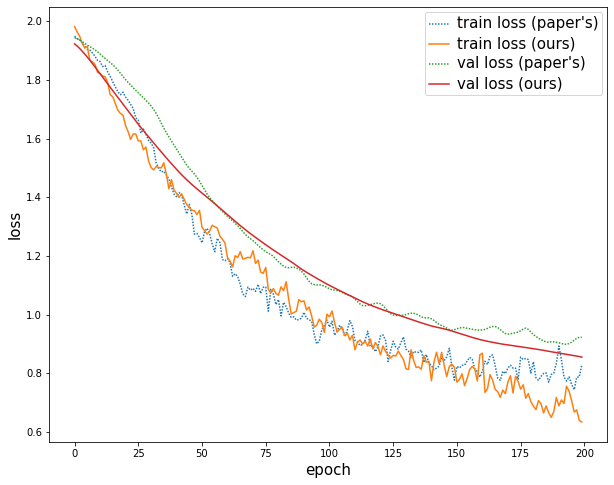

In [503]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"train loss (paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss_list"][:num_obs],
                        "val loss (paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss_list"][:num_obs],})
df_loss = df_loss.ewm(com=1).mean()
plot(df_loss, "plots/cora_loss.png", x_label='epoch', y_label="loss")

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/cora_acc.png!


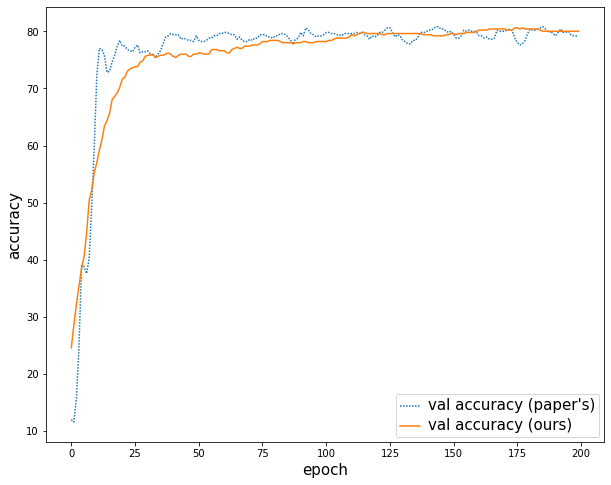

In [504]:
num_obs = len(df_official)
df_acc = pd.DataFrame({"val accuracy (paper's)": df_official["val_acc"],
                        "val accuracy (ours)": df_our["val_acc_list"][:num_obs]})
plot(df_acc, "plots/cora_acc.png", x_label='epoch', y_label="accuracy")

# gossipcop

In [505]:
df_official = pd.read_csv(os_join(root, "logs/gossipcop_bert_official_results.csv"))
df_our = read_result_from_mllog(root, "e9c6cefc368a4de0abcbe79bb795b67d")

df_official["val_acc"] *= 100
df_official["test_acc"] *= 100


saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/gossipcop_loss.png!


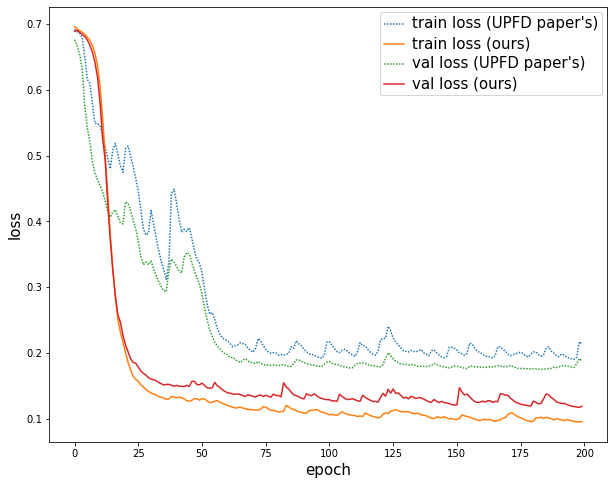

In [506]:
num_obs = len(df_official)
df_loss = pd.DataFrame({
                        "train loss (UPFD paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss"][:num_obs],
                        "val loss (UPFD paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss"][:num_obs],})
df_loss = df_loss.ewm(com=3).mean()
plot(df_loss, "plots/gossipcop_loss.png", x_label='epoch', y_label="loss")

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/gossipcop_acc.png!


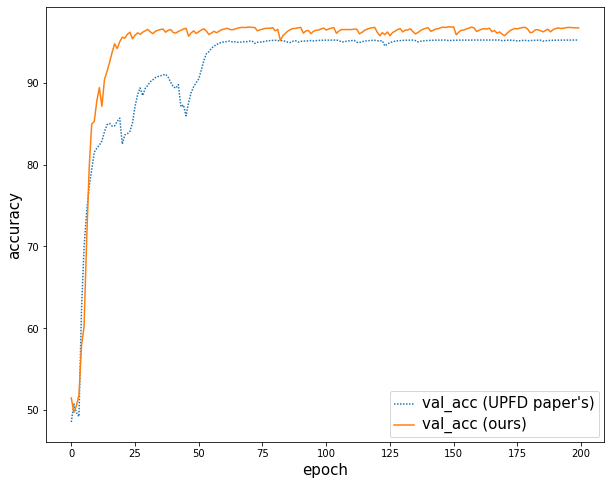

In [507]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"val_acc (UPFD paper's)": df_official["val_acc"],
                        "val_acc (ours)": df_our["val_acc"][:num_obs],
                        # "val f1 (paper's)": df_official["val_f1"],
                        # "val f1 (ours)": df_our["val_f1"][:num_obs],
                        })
df_loss = df_loss.ewm(com=2).mean()
plot(df_loss, "plots/gossipcop_acc.png", x_label='epoch', y_label="accuracy")

# politifact

In [508]:
df_official = pd.read_csv(os_join(root, "logs/politifact_spacy_official_results.csv"))
df_our = read_result_from_mllog(root, "05638707dc0140aa96d5962c27a8059a")

df_official["val_acc"] *= 100
df_official["test_acc"] *= 100


saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/politifact_loss.png!


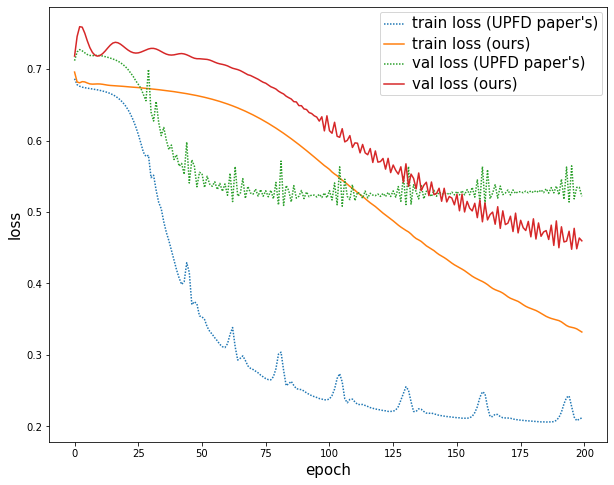

In [509]:
num_obs = len(df_official)
df_loss = pd.DataFrame({"train loss (UPFD paper's)": df_official["train_loss"],
                        "train loss (ours)": df_our["train_loss"][:num_obs],
                        "val loss (UPFD paper's)": df_official["val_loss"],
                        "val loss (ours)": df_our["val_loss"][:num_obs]})

plot(df_loss, "plots/politifact_loss.png", x_label='epoch', y_label="loss")

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/politifact_acc.png!


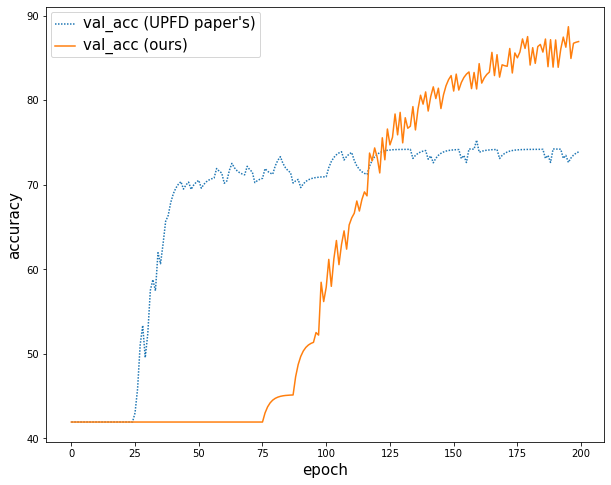

In [510]:

num_obs = len(df_official)
df_loss = pd.DataFrame({"val_acc (UPFD paper's)": df_official["val_acc"],
                        "val_acc (ours)": df_our["val_acc"][:num_obs],
                        # "val f1 (paper's)": df_official["val_f1"],
                        # "val f1 (ours)": df_our["val_f1"][:num_obs],
                        })
df_loss = df_loss.ewm(com=2).mean()

plot(df_loss, "plots/politifact_acc.png", x_label='epoch', y_label="accuracy", save=True)

# num attention heads

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/num_attention_heads.png!


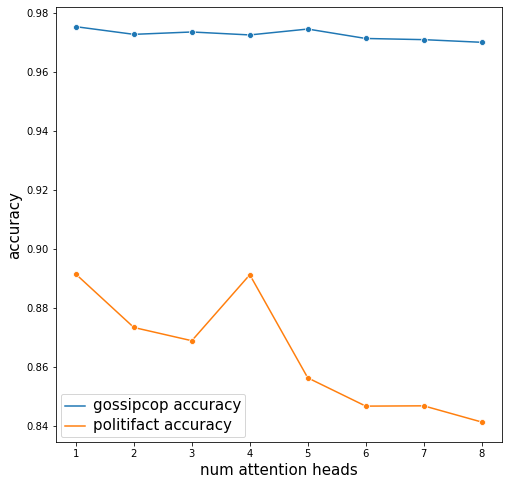

In [511]:
plot_2(file_name = "num_attention_heads.csv", save=True)

saved /Users/chau/my_work/research/GNN_fake_news_detection/fake_news_detection_gnns/plots/num_layers.png!


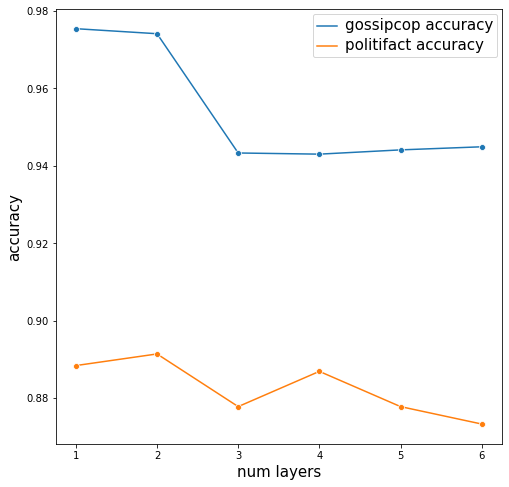

In [512]:
plot_2(file_name = "num_layers.csv", save=True)